In [18]:
from langgraph.graph import StateGraph, END

In [19]:
from langchain_core.prompts import PromptTemplate


In [20]:
from typing import TypedDict, Annotated


In [21]:
from agent import Agent
llm=Agent()

In [22]:
class AppState(TypedDict):
    content:str
    text:str
    trans:str

In [ ]:
def gen_content(state:AppState)->AppState:
    prompt="""
    Explain about {text} in 3 bullet ponits
    """
    gen_temp=PromptTemplate.from_template(prompt)
    chain=gen_temp|llm.get_agent()
    gen_res=chain.invoke({"text":state["text"]})
    state["content"]=gen_res.content
    return state
    

In [ ]:
def translate(state:AppState)->AppState:
    prompt = """
    translate {trans} to french
    """
    trans_temp=PromptTemplate.from_template(prompt)
    trans_chain=trans_temp|llm.get_agent()
    trans_res=trans_chain.invoke({"trans":state["content"]})
    state["trans"]=trans_res.content
    return state
    

In [ ]:
wf=StateGraph(AppState)
wf.add_node("generate",gen_content)
wf.add_node("translate",translate)
wf.set_entry_point("generate")
wf.add_edge("generate","translate")
wf.add_edge("translate",END)
graph=wf.compile()


In [26]:
output=graph.invoke({"text":"AI"})

TypeError: Expected a Runnable, callable or dict.Instead got an unsupported type: <class 'agent.Agent'>

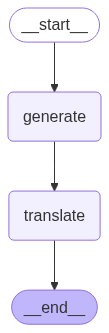

In [ ]:
from IPython.display import Image,Markdown
Image(graph.get_graph().draw_mermaid_png())

In [ ]:
Markdown(output["content"])

NameError: name 'Markdown' is not defined